# Importing the data and cleaning some strings

In [55]:
df=pd.read_csv('trainining_table3.csv',sep=',',index_col=[0,1])
from neatmartinet import rmv_end_str
df.columns=list(map(lambda x:rmv_end_str(x,'score'),df.columns))
for c in df.columns:
    if 'wostopwords' in c:
        tokens = c.split('_')
        c2='_'.join([tokens[0],'wo',tokens[2]])
        df.rename(columns={c:c2},inplace=True)
traincols=list(filter(lambda c:c not in ['y_true','y_proba'],df.columns))
X_set=df[traincols]
y_set_true=df['y_true']

In [56]:
df.describe()

,city_fuzzy,country_code_exact,duns_exact,hasairbusname_source,hasairbusname_target,isbigcity_source,isbigcity_target,name_acronym_fuzzy,name_acronym,name_fuzzy,name_token,name_wo_fuzzy,name_wo_token,postalcode_1stdigit_exact,postalcode_2digits_exact,postalcode_exact,postalcode_fuzzy,street_fuzzy,street_token,street_wo_fuzzy,street_wo_token,y_true
count,3770.000000,3770.0,3770.000000,3770.0,3770.000000,3770.00000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,0.252117,1.0,0.049602,0.0,0.005570,0.18992,0.184615,0.123050,-0.265544,0.284769,0.376143,0.257687,0.353003,0.588594,0.515385,0.435279,0.256658,0.387098,0.487979,0.283740,0.467263,0.368435
std,0.751589,0.0,0.217150,0.0,0.074436,0.39229,0.388037,0.744768,0.312805,0.585378,0.604254,0.642734,0.667483,0.492154,0.499830,0.495859,0.707278,0.557564,0.550123,0.612932,0.605141,0.482444
min,-1.000000,1.0,0.000000,0.0,0.000000,0.00000,0.000000,-1.000000,-0.900000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-0.500000,1.0,0.000000,0.0,0.000000,0.00000,0.000000,-0.420000,-0.580000,-0.240000,-0.195000,-0.340000,-0.340000,0.000000,0.000000,0.000000,-0.460000,-0.140000,-0.040000,-0.320000,-0.140000,0.000000
50%,0.180000,1.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.220000,0.460000,0.240000,0.580000,1.000000,1.000000,0.000000,0.200000,0.480000,0.680000,0.280000,0.760000,0.000000
75%,1.000000,1.0,0.000000,0.0,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.0,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Is  the data linearly separable?

## Pairplot visualization of class distribution

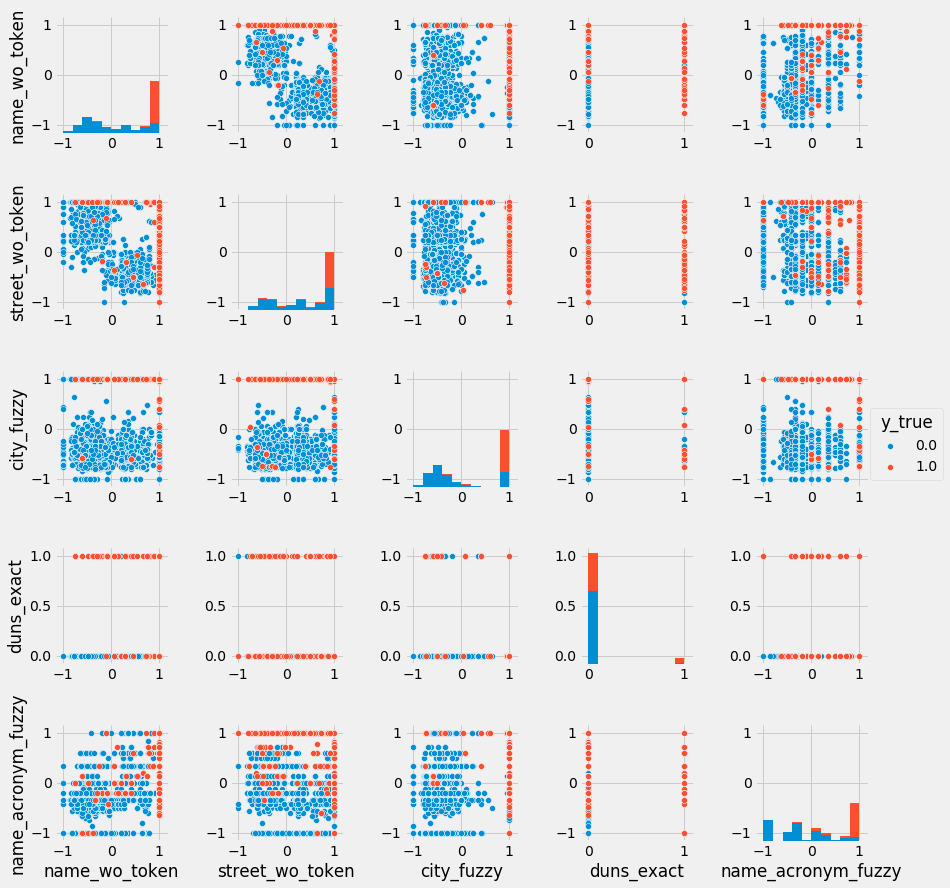

In [57]:
import seaborn as sns
valuecols=['name_wo_token','street_wo_token','city_fuzzy','duns_exact','name_acronym_fuzzy']
varcol='y_true'
X_pair=df[valuecols+[varcol]]
sns.pairplot(X_pair,hue=varcol,vars=valuecols);

# PCA Analysis of the columns

In [58]:
from sklearn.decomposition import PCA
n_components=2
pca = PCA(n_components=n_components)
pcacols=['pca'+str(i+1) for i in range(n_components) ]
pca.fit(X_set)
print('explained variance ration {0:.0%}'.format(sum(pca.explained_variance_ratio_)))
X_pca=pca.transform(X_set)
X_pca=pd.DataFrame(data=X_pca,columns=pcacols)
X_pca.index=X_set.index
valuecols=pcacols
X_pca['y_true']=y_set_true
transform=pd.DataFrame(pca.components_,index=pcacols,columns=[X_set.columns]).abs().transpose()
transform.sort_values(by='pca1',ascending=False).iloc[:4]

explained variance ration 77%


,pca1,pca2
city_fuzzy,0.373846,0.120935
postalcode_fuzzy,0.355806,0.143785
name_acronym_fuzzy,0.329845,0.308596
name_wo_token,0.273491,0.350572


## Pairplot of PCA

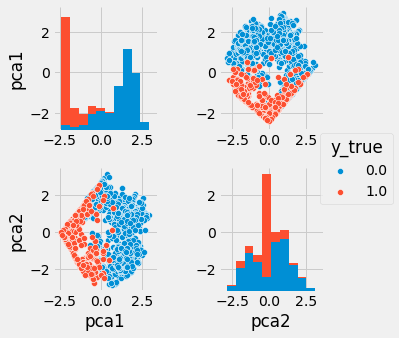

In [59]:
sns.pairplot(X_pca,hue='y_true',vars=valuecols);

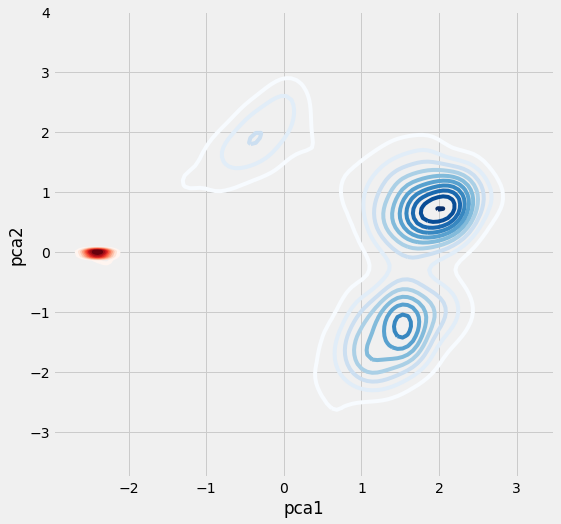

In [60]:
# Set up the figure
fig, ax = plt.subplots(figsize=(8, 8))

positives=X_pca.loc[X_pca['y_true']==1]
negatives=X_pca.loc[X_pca['y_true']==0]
from seaborn import kdeplot

ax = sns.kdeplot(positives['pca1'], positives['pca2'],cmap='Reds')
ax = sns.kdeplot(negatives['pca1'], negatives['pca2'],cmap='Blues')

# LDA Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_components=3
lda=LinearDiscriminantAnalysis(n_components=n_components)
ldacols=['pca'+str(i+1) for i in range(n_components) ]
lda.fit(X_set,y_set_true)
X_lda=lda.transform(X_set,)
X_lda=pd.DataFrame(X_lda,columns=['lda_value'])
X_lda.index=X_set.index
X_lda['y_true']=y_set_true

/Users/paulogier/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


/Users/paulogier/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


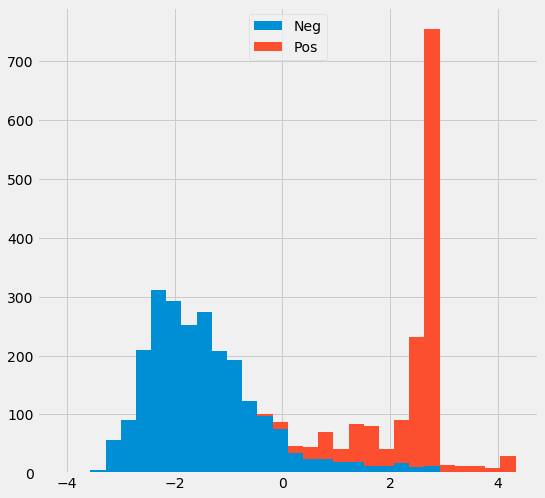

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
positives=X_lda.loc[X_lda['y_true']==1,'lda_value']
positives.name='Positives'
negatives=X_lda.loc[X_lda['y_true']==0,'lda_value']
negatives.name='Negatives'
ax.hist([negatives,positives],stacked=True,bins=30,label=['Neg','Pos'])
ax.legend(loc='upper center');

# Working with different classifiers

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_set,y_set_true)

In [64]:
from sklearn.svm import SVC
svc= SVC(probability=True,kernel='poly')
svc.fit(X_train,y_train)
model = svc

In [65]:
y_pred=model.predict(X_test)
y_pred=pd.Series(index=X_test.index,data=y_pred,name='y_pred')
y_proba=pd.DataFrame(svc.predict_proba(X_test))[1]
y_proba.name='y_proba'
y_proba.index=X_test.index
y_true=y_test

## Roc curve and precision recall curve

(2, 2)
*** MODEL EVALUATION ***
Precision 0.95 | Recall 0.95
Confusion Matrix


/Users/paulogier/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


          Pred. Neg  Pred. Pos
Act. Neg        565         19
Act. Pos         16        343


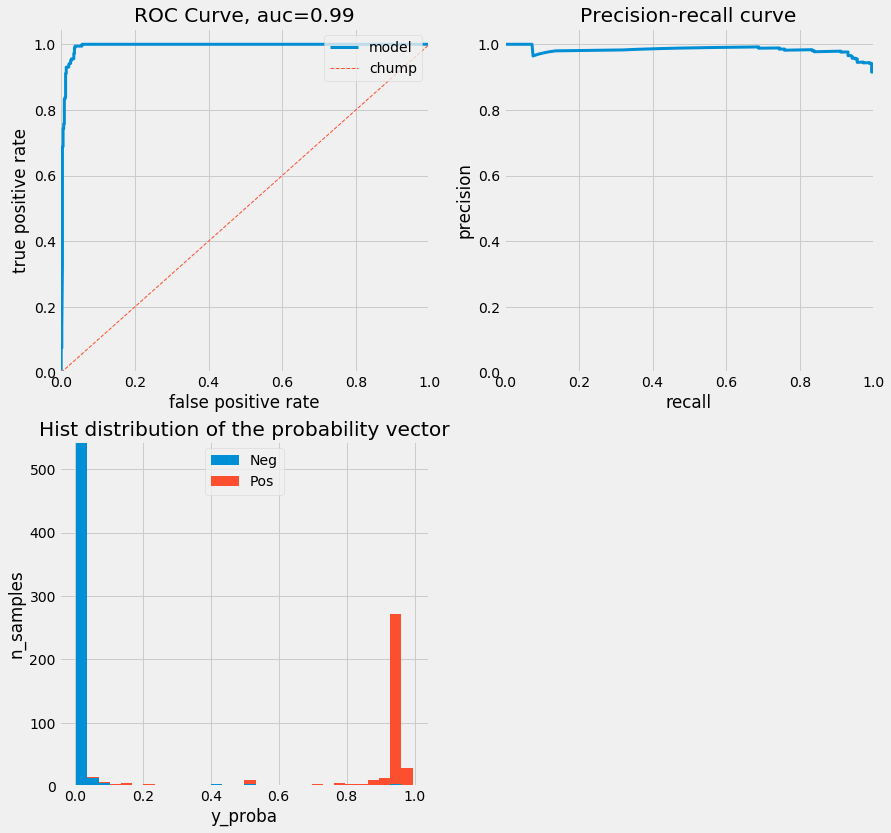

In [66]:
###
from sklearn.metrics import roc_curve,precision_score,recall_score, confusion_matrix,roc_auc_score,precision_recall_curve
# precision and recall
precision = precision_score(y_true=y_true,y_pred=y_pred)
recall = precision_score(y_true=y_true,y_pred=y_pred)
# confusion matrix
confusion=pd.DataFrame(confusion_matrix(y_true=y_true,y_pred=y_pred),index=['Act. Neg','Act. Pos'],columns=['Pred. Neg','Pred. Pos'])
print(confusion.shape)
# roc_curve
fpr,tpr, thresholds=roc_curve(y_true=y_true, y_score=y_proba)
auc=roc_auc_score(y_true=y_true, y_score=y_proba)

# precision recall curve
a_precision,a_recall,thresholds=precision_recall_curve(y_true=y_true, probas_pred=y_proba)

fig = plt.figure(figsize=(13,13))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
dummy=np.linspace(0,1,y_true.shape[0])

ax1.plot(fpr,tpr,lw=3,label='model')
ax1.set_xlim(-0.005,1)
ax1.set_ylim(0,1.05)
ax1.plot(dummy,dummy,lw=1,ls='--',label='chump')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.set_title('ROC Curve, auc={0:.2f}'.format(auc));
ax1.legend(loc='upper right')

ax2.plot(a_recall,a_precision,lw=3,label='model')
#ax2.plot(dummy,dummy,lw=1,ls='--',label='chump')
ax2.set_xlim(-0.005,1)
ax2.set_ylim(0,1.05)
ax2.set_xlabel('recall')
ax2.set_ylabel('precision')
ax2.set_title('Precision-recall curve'.format(auc));


#ax3
positives=y_proba.loc[y_true==1]
positives.name='Positives'
negatives=y_proba.loc[y_true==0]
negatives.name='Negatives'
ax3.hist([negatives,positives],stacked=True,bins=30,label=['Neg','Pos'])
ax3.legend(loc='upper center')
ax3.set_title('Hist distribution of the probability vector')
ax3.set_xlabel('y_proba')
ax3.set_ylabel('n_samples')
print('*** MODEL EVALUATION ***')
print('Precision {0:.2f} | Recall {0:.2f}'.format(precision,recall))
print('Confusion Matrix')
print(confusion)